### Waterfall Generator for Any Leand

In [1]:
#Importing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import shap
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Train model (run once)
df = pd.read_csv('Bank_Marketing.csv', sep=';')
df['y'] = (df['y'] == 'yes').astype(int)

In [7]:
cat_cols = ['job','marital','education','default','housing','loan',
            'contact','month','day_of_week','poutcome']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

X = df.drop('y', axis=1)
y = df['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",12
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [13]:
explainer = shap.TreeExplainer(rf)

In [15]:
# 2. Load your scored CSV
results = pd.read_csv('Bank_Marketing_Predictive_Scored.csv')

In [16]:
# 3. CHANGE THIS NUMBER TO ANY LEAD YOU WANT (0 to 10296)
lead_id = 0        # ← change this
print(f"Generating waterfall for lead {lead_id} → probability {results.loc[lead_id, 'probability_%']:.1f}%")

Generating waterfall for lead 0 → probability 39.8%


In [17]:
# 4. Get SHAP values for this ONE lead
one_lead = X_test.iloc[[lead_id]]                     # double brackets = keep DataFrame shape
shap_values = explainer.shap_values(one_lead)

In [18]:
# 5. Extract class 1 ("yes") — works on your SHAP 0.48.0
sv = shap_values[:, :, 1] if shap_values.ndim == 3 else (shap_values[1] if isinstance(shap_values, list) else shap_values)
base = explainer.expected_value[1] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value

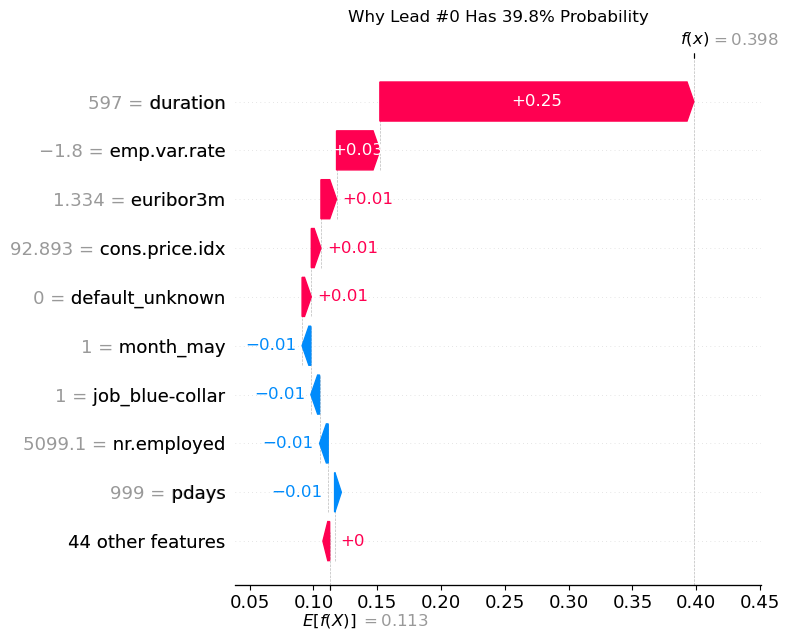

In [19]:
# 6. Waterfall
shap.plots.waterfall(shap.Explanation(values=sv[0],
                                      base_values=base,
                                      data=one_lead.iloc[0]), show=False)
plt.title(f'Why Lead #{lead_id} Has {results.loc[lead_id, "probability_%"]:.1f}% Probability')
plt.tight_layout()
plt.show()
